**1**. (100 points)

Implement the Drossel and Schwabl forest fire model using the [description](https://en.wikipedia.org/wiki/Forest-fire_model#/media/File:Forest_fire_model.gif) from Wikipedia

```
The model is defined as a cellular automaton on a grid with Ld cells. L is the sidelength of the grid and d is its dimension. A cell can be empty, occupied by a tree, or burning. The model of Drossel and Schwabl (1992) is defined by four rules which are executed simultaneously:
A burning cell turns into an empty cell
A tree will burn if at least one neighbor is burning
A tree ignites with probability f even if no neighbor is burning
An empty space fills with a tree with probability p
```

- Parameters for the simulation are
```python
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps
```
- You need to write code create an array named `sim` with shape (steps, n, n)
- **Note**: Your code should make use of `numpy` optimizations as much as possible - the simulation itself takes less than a second to complete on my fairly old desktop
- Now create a plot as shown from the `sims` array
![](./forest_fire.png)
- Code to display an animation of the `sims` array is provided
- Your animation should be similar to the one shown

Hints:

- For simplicity, assume that the borders of the simulation grid are fixed so they are always empty (the borders are *outside* the 100 by 100 grid you are saving at each step.
- Use marginalization to get the required numbers for the plot of population sizes over time
- Use *views* liberally - they do not incur the cost of a copy


In [3]:
from IPython.display import Video

Video("forest_fire.mp4", embed = True)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
np.random.seed(123)

In [5]:
EMPTY, TREE, BURN = 0, 1, 2

In [6]:
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps

In [47]:
%%time

sim = np.zeros((steps+1, n, n))
grid = np.zeros((n+2,n+2))
forest = grid[1:-1, 1:-1]
sim[0] = forest
for i in range(1, steps+1):
    s = (
        (grid[:-2, :-2] == BURN) +
        (grid[:-2, 1:-1] == BURN) +
        (grid[:-2, 2:] == BURN) +
        (grid[1:-1, :-2] == BURN) +
        (grid[1:-1, 2:] == BURN) +
        (grid[2:, :-2] == BURN) +
        (grid[2:, 1:-1] == BURN) +
        (grid[2:, 2:] == BURN)
    )
    
    # At least one neighbor is burning -> or operation -> plus
    
    old_forest = forest.copy()
    forest[old_forest == EMPTY] = np.where(np.random.uniform(0,1,(old_forest == EMPTY).sum()) < p, TREE, EMPTY)
    forest[old_forest == BURN] = EMPTY
    forest[old_forest == TREE]  = np.where(
        s[old_forest == TREE] + (np.random.uniform(0,1,(old_forest == TREE).sum()) < f), 
        BURN, TREE
    )
    
    sim[i] = forest

CPU times: user 420 ms, sys: 52 ms, total: 472 ms
Wall time: 469 ms


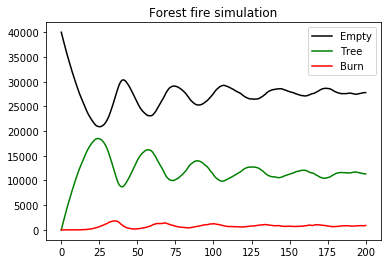

In [48]:
n_empty = (sim == EMPTY).sum(axis=(1,2))
n_tree = (sim == TREE).sum(axis=(1,2))
n_fire = (sim == BURN).sum(axis=(1,2))
t = range(steps+1)

plt.plot(t, n_empty, 'k', t, n_tree, 'g', t, n_fire, 'r')
plt.legend(['Empty', 'Tree', 'Burn'])
plt.title('Forest fire simulation')
plt.savefig('forest_fire.png')

In [8]:
%%capture

fig = plt.figure(figsize=(6,6))
im = plt.imshow(sim[0], cmap=ListedColormap(['black', 'green', 'red']), vmin=0, vmax=2)

def updatefig(j):
    im.set_array(sim[j])
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames=range(steps), 
                              interval=50, blit=True);

In [9]:
%%time
HTML(ani.to_jshtml())

CPU times: user 3min 8s, sys: 13.1 s, total: 3min 21s
Wall time: 17 s


In [10]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('forest_fire.mp4', writer=writer)